# Lab 3-1: Surface Energy Balance at Kettle Ponds - Radiation Balance
Written by Daniel Hogan - April, 2023.

Modified by Jessica Lundquist - April, 2023.

Modified by Eli Schwat - January 2024.

In [1]:
import xarray as xr
import numpy as np
import os 
import urllib
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Install a package called pysolar
!pip install pysolar

In [3]:
# Now that we've installed that package, we need to import all of its functions
from pysolar.solar import radiation, get_altitude

### SOS Data

In [4]:
sos_file = "../data/sos_full_dataset_30min.nc"
sos_dataset = xr.open_dataset(sos_file)

### Select a subset of days and plot all four radiometer variables

`Rsw_in_9m_d` - Incoming shortwave radiation, measured at 9 meters on tower

`Rsw_out_9m_d` - Outgoing shortwave radiation, measured at 9 meters on tower

`Rlw_in_9m_d` - Incoming longwave radiation, measured at 9 meters on tower

`Rlw_out_9m_d` - Outgoing longwave radiation, measured at 9 meters on tower

<Axes: xlabel='time'>

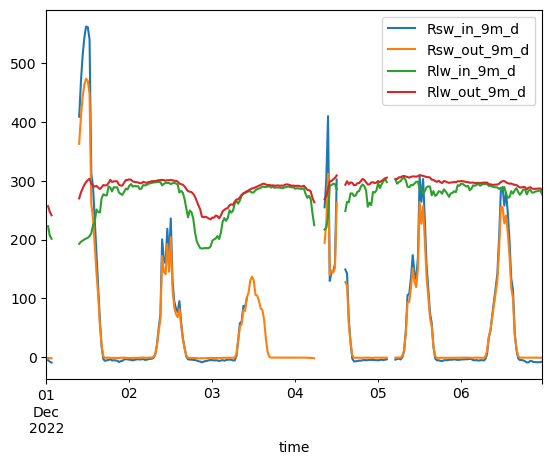

In [5]:
sos_dataset[[
    'Rsw_in_9m_d',
    'Rsw_out_9m_d',
    'Rlw_in_9m_d',
    'Rlw_out_9m_d'
]].sel(time = 
    slice('20221201', '20221206')
).to_dataframe().plot() 

#Note: converting to_dataframe here allows use to use a simple convenience function to plot all 4 variables at once

### Exercise: calculate and plot net radiation

$$R_n = SW_{in} - SW_{out} + LW_{in} - LW_{out}$$

In [6]:
# Write this code yourself

### Use Pysolar to get clear sky radiation time series

Note that the `radiation.get_radiation_direct` function requires that we provide a datetime object that is "timezone  aware". See the annotations in the code below.

In [33]:
import pytz
kettle_ponds_lat_lon = [-106.97298,38.94182]
dates = pd.date_range(dt.datetime(2022,12, 1), dt.datetime(2022,12, 6),  freq='30Min')

slice('20221201', '20221206')

clear_sky_rad = []
for date in dates:
    date = (pytz.utc.localize(date)).to_pydatetime() # This assigns the UTC timezone to the date
    altitude_deg = get_altitude(kettle_ponds_lat_lon[1], kettle_ponds_lat_lon[0], date)
    clear_sky_rad.append(radiation.get_radiation_direct(date, altitude_deg))

/Users/elischwat/miniforge3/envs/snow-hydrology/lib/python3.10/site-packages/pysolar/numeric.py:62: UserWarning: no explicit representation of timezones available for np.datetime64
  dd = numpy.array(d, dtype='datetime64[D]')
/Users/elischwat/miniforge3/envs/snow-hydrology/lib/python3.10/site-packages/pysolar/numeric.py:63: UserWarning: no explicit representation of timezones available for np.datetime64
  dy = numpy.array(d, dtype='datetime64[Y]')


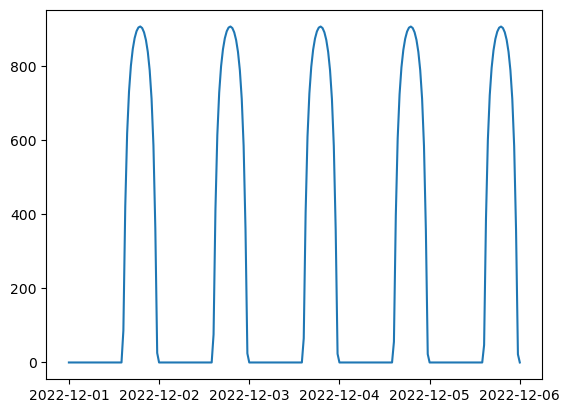

In [34]:
plt.plot(dates,clear_sky_rad)

Note how "solar noon" appears late in the day. This is because the timezone is UTC, which is ahead of US/Mountain Time. We can convert the dates we have to US/Mountain Time, so that we can compare with our own dataset.

In [37]:
dates_index = pd.DatetimeIndex(dates, tz='UTC')
dates_index = dates_index.tz_convert('US/Mountain').tz_localize(None)

/Users/elischwat/miniforge3/envs/snow-hydrology/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


<Axes: xlabel='time'>

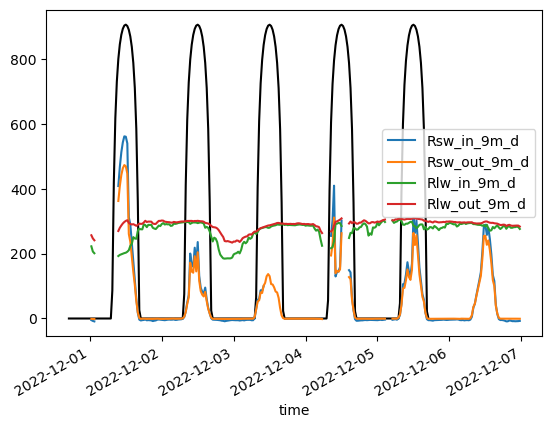

In [38]:
fig, ax = plt.subplots()
ax.plot(dates_index, clear_sky_rad, color='black', label='Ideal SW_IN')
sos_dataset[[
    'Rsw_in_9m_d',
    'Rsw_out_9m_d',
    'Rlw_in_9m_d',
    'Rlw_out_9m_d'
]].sel(time = 
    slice('20221201', '20221206')
).to_dataframe().plot(ax=ax) 